# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


Image shape: (512, 512, 3) | dtype: uint8


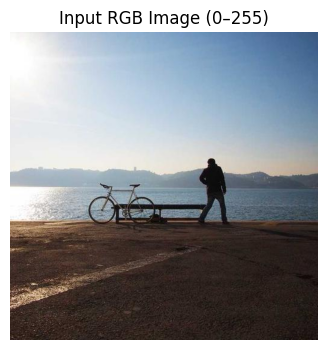

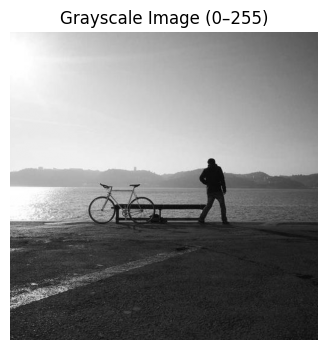

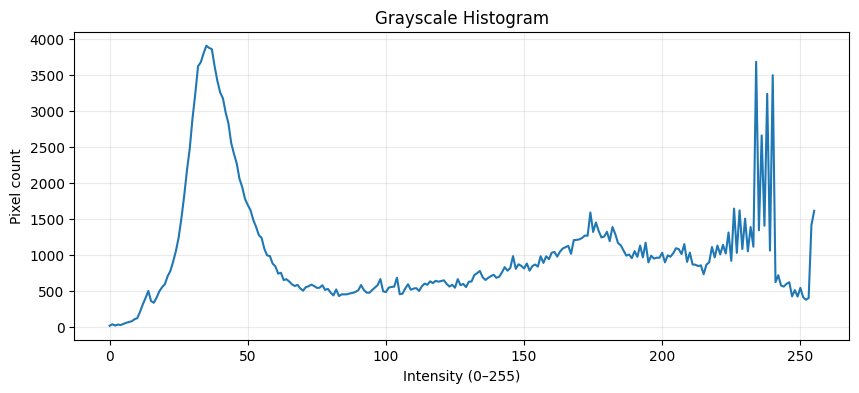

In [3]:
# Part A — Histograms (Grayscale + RGB)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import requests

# 1) Loading an RGB image (0–255)
def load_bgr_from_url(url: str, timeout: int = 20) -> np.ndarray:
    """Download an image from a URL and decode with OpenCV (returns BGR uint8)."""
    r = requests.get(url, timeout=timeout)
    r.raise_for_status()
    nparr = np.frombuffer(r.content, np.uint8)
    img_bgr = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    if img_bgr is None:
        raise ValueError("Could not decode image bytes into an OpenCV image.")
    return img_bgr

def to_rgb(img_bgr: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_path = "https://picsum.photos/seed/cv_assign_img3/512/512"
img_bgr =  load_bgr_from_url(img_path)
img_rgb = to_rgb(img_bgr)

print("Image shape:", img_rgb.shape, "| dtype:", img_rgb.dtype)

plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Input RGB Image (0–255)")
plt.axis("off")
plt.show()

# 2) RGB -> Grayscale (0–255)
# Weighted method
gray = (0.299 * img_rgb[...,0] + 0.587 * img_rgb[...,1] + 0.114 * img_rgb[...,2]).round().astype(np.uint8)

plt.figure(figsize=(6,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image (0–255)")
plt.axis("off")
plt.show()

# Part A1: Grayscale histogram using pure NumPy loops
def gray_histogram(gray_img: np.ndarray) -> np.ndarray:
    # Input: 2D grayscale image, uint8/0–255
    # Output: 1D histogram of length 256 (counts)
    # Uses pure loops (no cv2 histogram)
    hist = np.zeros(256, dtype=np.int64)
    h, w = gray_img.shape
    for i in range(h):
        for j in range(w):
            v = int(gray_img[i, j])
            hist[v] += 1
    return hist

hist_gray = gray_histogram(gray)

plt.figure(figsize=(10,4))
plt.plot(hist_gray)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel count")
plt.grid(True, alpha=0.25)
plt.show()

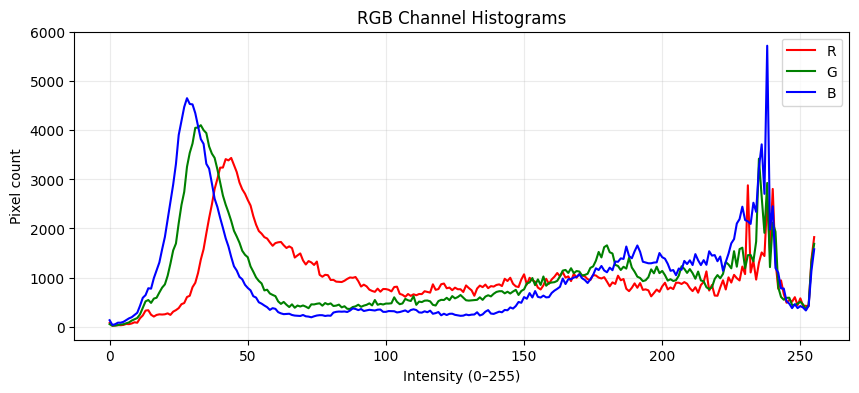

In [7]:
# Part A2: RGB Histogram
import numpy as np
import matplotlib.pyplot as plt

def rgb_histogram(img_rgb: np.ndarray) -> np.ndarray:
    # Input: HxWx3 RGB image, uint8/0–255
    # Output: 3x256 histogram (R,G,B channels)
    # Uses pure loops (no cv2 histogram)
    hists = np.zeros((3, 256), dtype=np.int64)
    h, w, _ = img_rgb.shape
    for i in range(h):
        for j in range(w):
            r, g, b = img_rgb[i, j]
            hists[0, int(r)] += 1
            hists[1, int(g)] += 1
            hists[2, int(b)] += 1
    return hists

hist_rgb = rgb_histogram(img_rgb)

plt.figure(figsize=(10,4))
plt.plot(hist_rgb[0], label="R", color="red")
plt.plot(hist_rgb[1], label="G", color="green")
plt.plot(hist_rgb[2], label="B", color="blue")
plt.title("RGB Channel Histograms")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel count")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

Max abs diff per channel [H,S,V]: [1 1 0]
Mean abs diff per channel [H,S,V]: [0.02  0.026 0.   ]


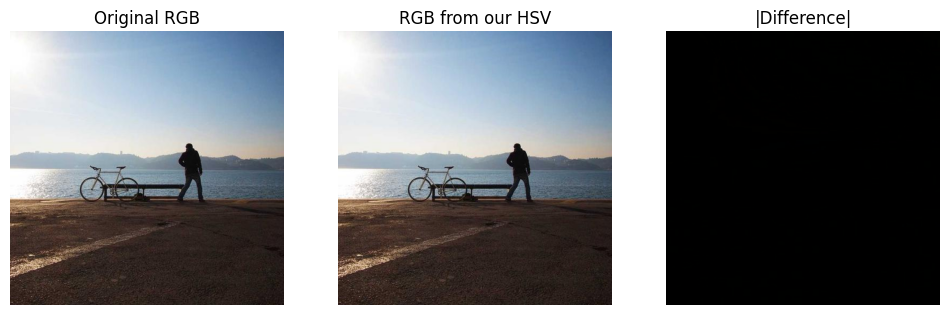

In [8]:
# Part B — RGB to HSV (NumPy)
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv(img_rgb: np.ndarray) -> np.ndarray:
    # Converting an 8-bit RGB image (0–255) -> 8-bit HSV in OpenCV scaling:
    #   H: 0..179, S: 0..255, V: 0..255
    img = img_rgb.astype(np.float32) / 255.0
    r, g, b = img[..., 0], img[..., 1], img[..., 2]

    cmax = np.maximum(np.maximum(r, g), b)
    cmin = np.minimum(np.minimum(r, g), b)
    delta = cmax - cmin

    h = np.zeros_like(cmax, dtype=np.float32)
    mask = delta > 1e-8

    mask_r = mask & (cmax == r)
    mask_g = mask & (cmax == g)
    mask_b = mask & (cmax == b)

    h[mask_r] = (60.0 * ((g[mask_r] - b[mask_r]) / delta[mask_r])) % 360.0
    h[mask_g] = 60.0 * (((b[mask_g] - r[mask_g]) / delta[mask_g]) + 2.0)
    h[mask_b] = 60.0 * (((r[mask_b] - g[mask_b]) / delta[mask_b]) + 4.0)

    s = np.zeros_like(cmax, dtype=np.float32)
    nonzero = cmax > 1e-8
    s[nonzero] = delta[nonzero] / cmax[nonzero]

    v = cmax

    H = np.round(h / 2.0).astype(np.uint8)
    S = np.round(s * 255.0).astype(np.uint8)
    V = np.round(v * 255.0).astype(np.uint8)

    return np.stack([H, S, V], axis=-1)

hsv_np = rgb_to_hsv(img_rgb)
hsv_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

diff = np.abs(hsv_np.astype(np.int16) - hsv_cv.astype(np.int16))
print("Max abs diff per channel [H,S,V]:", diff.reshape(-1,3).max(axis=0))
print("Mean abs diff per channel [H,S,V]:", diff.reshape(-1,3).mean(axis=0).round(3))

rgb_back = cv2.cvtColor(hsv_np, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb);  plt.title("Original RGB"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(rgb_back); plt.title("RGB from our HSV"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(np.clip(np.abs(img_rgb.astype(np.int16)-rgb_back.astype(np.int16)),0,255).astype(np.uint8))
plt.title("|Difference|"); plt.axis("off")
plt.show()

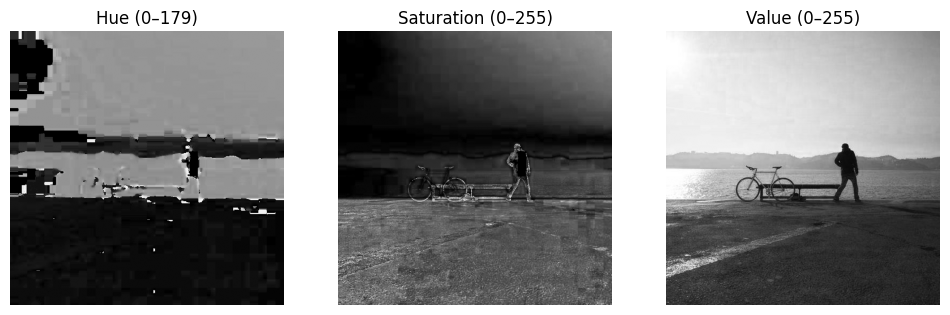

In [9]:
# Visualizing HSV channels from our implementation
import matplotlib.pyplot as plt

H, S, V = hsv_np[...,0], hsv_np[...,1], hsv_np[...,2]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(H, cmap="gray"); plt.title("Hue (0–179)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(S, cmap="gray"); plt.title("Saturation (0–255)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(V, cmap="gray"); plt.title("Value (0–255)"); plt.axis("off")
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

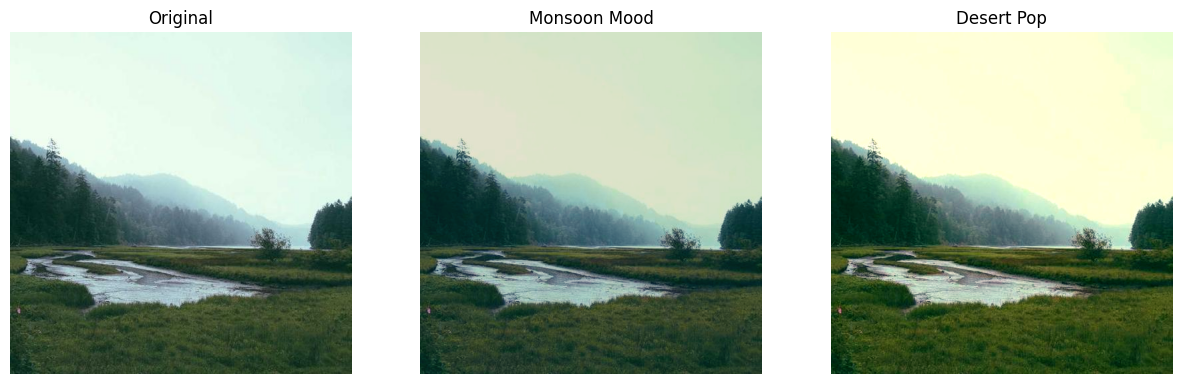

Filter notes:
- Monsoon Mood: hue shift + saturation + cool-shadow split-toning -> works well for greenery / rainy / overcast scenes.
- Desert Pop  : warm tint + vibrance + gamma/contrast -> works well for sunsets, deserts, beach golden-hour images.


In [14]:
# Part C — Two custom filters (NumPy + cv2)
import numpy as np
import cv2
import matplotlib.pyplot as plt

def _clip_u8(x: np.ndarray) -> np.ndarray:
    return np.clip(x, 0, 255).astype(np.uint8)

def adjust_brightness(img_rgb: np.ndarray, beta: float) -> np.ndarray:
    # new = old + beta
    out = img_rgb.astype(np.float32) + beta
    return _clip_u8(out)

def adjust_contrast(img_rgb: np.ndarray, alpha: float) -> np.ndarray:
    # new = alpha*(old - 128) + 128
    out = alpha * (img_rgb.astype(np.float32) - 128.0) + 128.0
    return _clip_u8(out)

def gamma_correction(img_rgb: np.ndarray, gamma: float) -> np.ndarray:
    # out = 255 * (in/255)^(gamma)
    # gamma < 1 brightens, gamma > 1 darkens
    x = img_rgb.astype(np.float32) / 255.0
    out = 255.0 * np.power(np.clip(x, 0.0, 1.0), gamma)
    return _clip_u8(out)

def hue_rotate(img_rgb: np.ndarray, degrees: float) -> np.ndarray:
    # OpenCV Hue is 0..179 => 1 step == 2 degrees
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    shift = int(np.round(degrees / 2.0))
    h = hsv[...,0].astype(np.int16)
    h = (h + shift) % 180
    hsv[...,0] = h.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def saturation_scale(img_rgb: np.ndarray, scale: float) -> np.ndarray:
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[...,1] = np.clip(hsv[...,1] * scale, 0, 255)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def vibrance_boost(img_rgb: np.ndarray, amount: float) -> np.ndarray:
    # Boosting saturation more for pixels that are currently low-saturation.
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    s = hsv[...,1]
    boost = amount * (255.0 - s) / 255.0
    hsv[...,1] = np.clip(s + boost * s, 0, 255)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def split_tone(img_rgb: np.ndarray, shadow_tint=(30, 60, 120), highlight_tint=(120, 90, 30), strength=0.25) -> np.ndarray:
    # Adding a cool tint to shadows and warm tint to highlights.
    img = img_rgb.astype(np.float32)
    lum = (0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]) / 255.0

    sh = np.clip((0.6 - lum) / 0.6, 0, 1)
    hi = np.clip((lum - 0.4) / 0.6, 0, 1)

    sh = sh[...,None]
    hi = hi[...,None]

    shadow_tint = np.array(shadow_tint, dtype=np.float32)[None,None,:]
    highlight_tint = np.array(highlight_tint, dtype=np.float32)[None,None,:]

    out = img * (1 - strength*(sh+hi)) + strength*(sh*shadow_tint + hi*highlight_tint)
    return _clip_u8(out)


# FILTER 1: "Monsoon Mood"
# Mods used:
#  - Hue rotation (towards teal)
#  - Saturation up
#  - Slight contrast + split-toning (cool shadows)
def monsoon_mood(img_rgb: np.ndarray) -> np.ndarray:
    out = hue_rotate(img_rgb, degrees=-12)
    out = saturation_scale(out, scale=1.18)
    out = adjust_contrast(out, alpha=1.08)
    out = split_tone(out, shadow_tint=(20, 60, 140), highlight_tint=(140, 110, 40), strength=0.20)
    return out


# FILTER 2: "Desert Pop"
# Mods used:
#  - Warm tint (channel gains)
#  - Vibrance boost
#  - Gamma correction + contrast
def desert_pop(img_rgb: np.ndarray) -> np.ndarray:
    img = img_rgb.astype(np.float32)

    r = img[...,0] * 1.10
    g = img[...,1] * 1.02
    b = img[...,2] * 0.93
    out = _clip_u8(np.stack([r,g,b], axis=-1))

    out = vibrance_boost(out, amount=0.55)
    out = gamma_correction(out, gamma=0.92)
    out = adjust_contrast(out, alpha=1.12)
    return out

img_path_new = "https://picsum.photos/id/11/512/512"
img_bgr_new = load_bgr_from_url(img_path_new)
img_rgb_new = to_rgb(img_bgr_new)

img1 = monsoon_mood(img_rgb_new)
img2 = desert_pop(img_rgb_new)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img_rgb_new); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(img1);    plt.title("Monsoon Mood"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(img2);    plt.title("Desert Pop"); plt.axis("off")
plt.show()

print("Filter notes:")
print("- Monsoon Mood: hue shift + saturation + cool-shadow split-toning -> works well for greenery / rainy / overcast scenes.")
print("- Desert Pop  : warm tint + vibrance + gamma/contrast -> works well for sunsets, deserts, beach golden-hour images.")

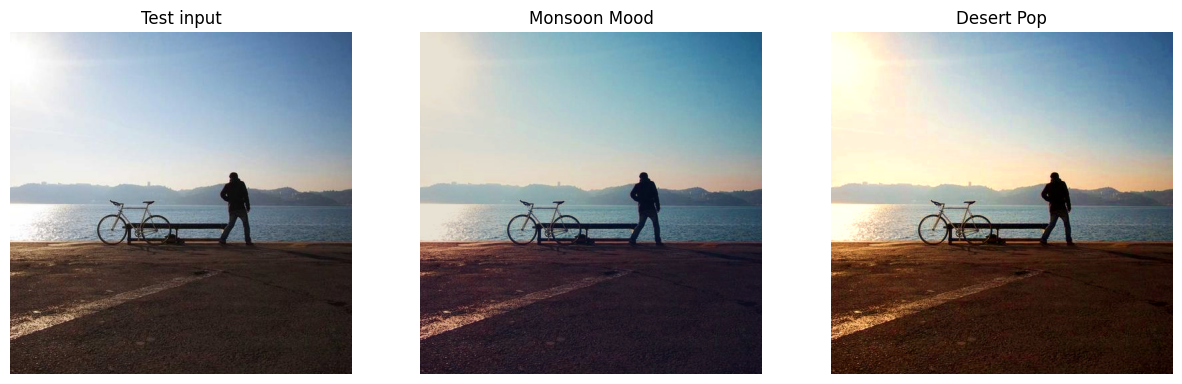

In [15]:
# Trying the filters on the RGB reconstructed image from Part B as well.
try:
    test_img = rgb_back  # from Part B
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1); plt.imshow(test_img); plt.title("Test input"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(monsoon_mood(test_img)); plt.title("Monsoon Mood"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(desert_pop(test_img));  plt.title("Desert Pop"); plt.axis("off")
    plt.show()
except NameError:
    print("Run Part B first to define rgb_back (optional).")

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

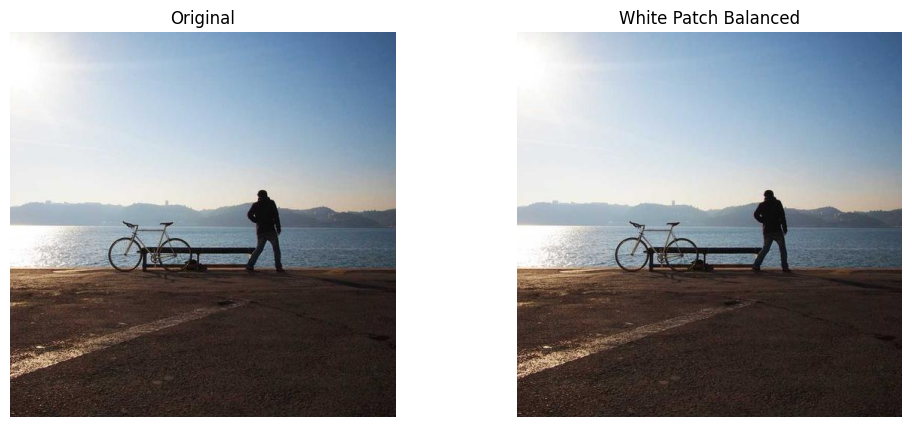

Mean RGB before : [123.03 126.17 131.53]
Mean RGB after  : [123.03 126.17 131.53]


In [26]:
# Part D — White Patch Balance
import numpy as np
import matplotlib.pyplot as plt

def white_patch_balance(img_rgb: np.ndarray) -> np.ndarray:
    # White Patch Method:
    # Assuming brightest pixel in each channel should become 255.
    # Scaling each channel by 255 / max(channel).
    img = img_rgb.astype(np.float32)
    max_vals = img.reshape(-1, 3).max(axis=0)
    scale = 255.0 / np.maximum(max_vals, 1e-6)
    out = img * scale[None, None, :]
    return np.clip(out, 0, 255).astype(np.uint8)

wb = white_patch_balance(img_rgb)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(wb);      plt.title("White Patch Balanced"); plt.axis("off")
plt.show()

orig_mean = img_rgb.reshape(-1,3).mean(axis=0)
wb_mean   = wb.reshape(-1,3).mean(axis=0)
print("Mean RGB before :", orig_mean.round(2))
print("Mean RGB after  :", wb_mean.round(2))

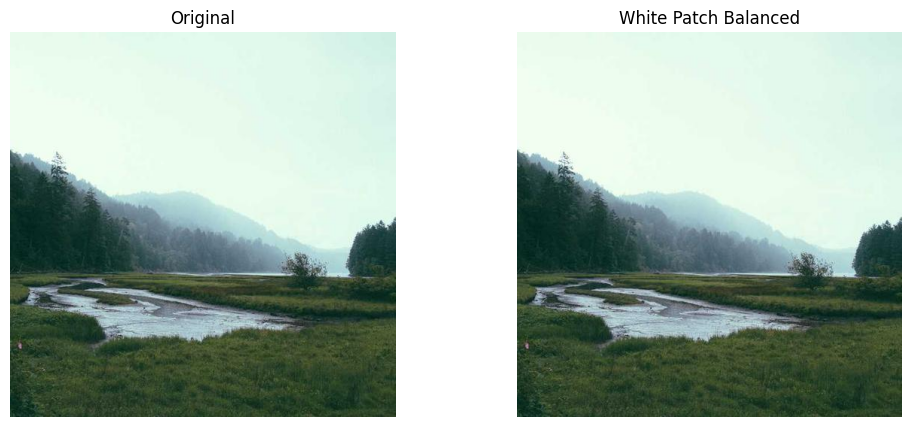

Mean RGB before : [141.27 163.05 149.55]
Mean RGB after  : [142.35 163.05 149.55]


In [25]:
wb_new = white_patch_balance(img_rgb_new)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb_new); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(wb_new);      plt.title("White Patch Balanced"); plt.axis("off")
plt.show()

orig_mean = img_rgb_new.reshape(-1,3).mean(axis=0)
wb_mean   = wb_new.reshape(-1,3).mean(axis=0)
print("Mean RGB before :", orig_mean.round(2))
print("Mean RGB after  :", wb_mean.round(2))

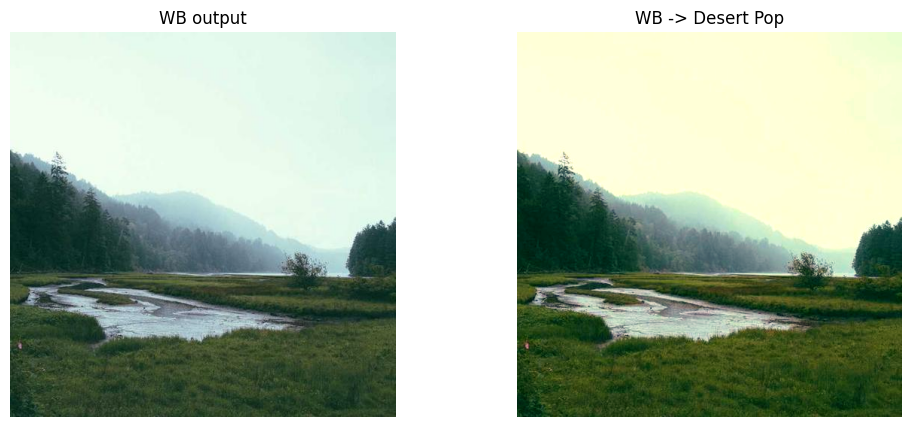

In [24]:
# White patch balance before a filter (sometimes looks nicer)
try:
    wb_then_filter = desert_pop(wb)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1); plt.imshow(wb);             plt.title("WB output"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(wb_then_filter); plt.title("WB -> Desert Pop"); plt.axis("off")
    plt.show()
except NameError:
    print("Run Part C first to use desert_pop (optional).")

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

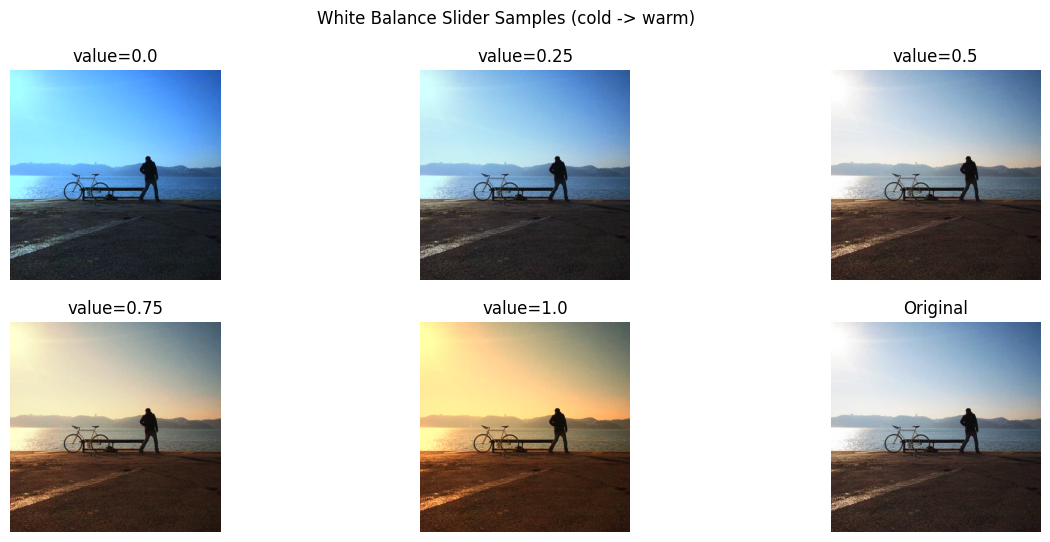

In [27]:
# Bonus Part E — White Balance Slider
import numpy as np
import matplotlib.pyplot as plt

def _apply_temperature_gains(img_rgb: np.ndarray, t: float) -> np.ndarray:
    # t in [-1, 1]: -1 = cold (more blue), +1 = warm (more red)
    img = img_rgb.astype(np.float32)

    red_gain   = 1.0 + 0.35 * t
    blue_gain  = 1.0 - 0.35 * t
    green_gain = 1.0 + 0.06 * (1 - abs(t))  # keep greens stable near extremes

    r = img[...,0] * red_gain
    g = img[...,1] * green_gain
    b = img[...,2] * blue_gain

    out = np.stack([r,g,b], axis=-1)
    return np.clip(out, 0, 255).astype(np.uint8)

def white_balance(img_rgb: np.ndarray, value: float) -> np.ndarray:
    # value in [0,1]: 0=coldest, 0.5=original, 1=warmest
    value = float(np.clip(value, 0.0, 1.0))
    cold = _apply_temperature_gains(img_rgb, t=-1.0)
    warm = _apply_temperature_gains(img_rgb, t=+1.0)

    if value <= 0.5:
        a = value / 0.5
        out = (1-a) * cold.astype(np.float32) + a * img_rgb.astype(np.float32)
    else:
        a = (value - 0.5) / 0.5
        out = (1-a) * img_rgb.astype(np.float32) + a * warm.astype(np.float32)

    return np.clip(out, 0, 255).astype(np.uint8)

# quick static demo
vals = [0.0, 0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(15,6))
for i,v in enumerate(vals, start=1):
    plt.subplot(2,3,i)
    plt.imshow(white_balance(img_rgb, v))
    plt.title(f"value={v}")
    plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.suptitle("White Balance Slider Samples (cold -> warm)", y=0.98)
plt.show()

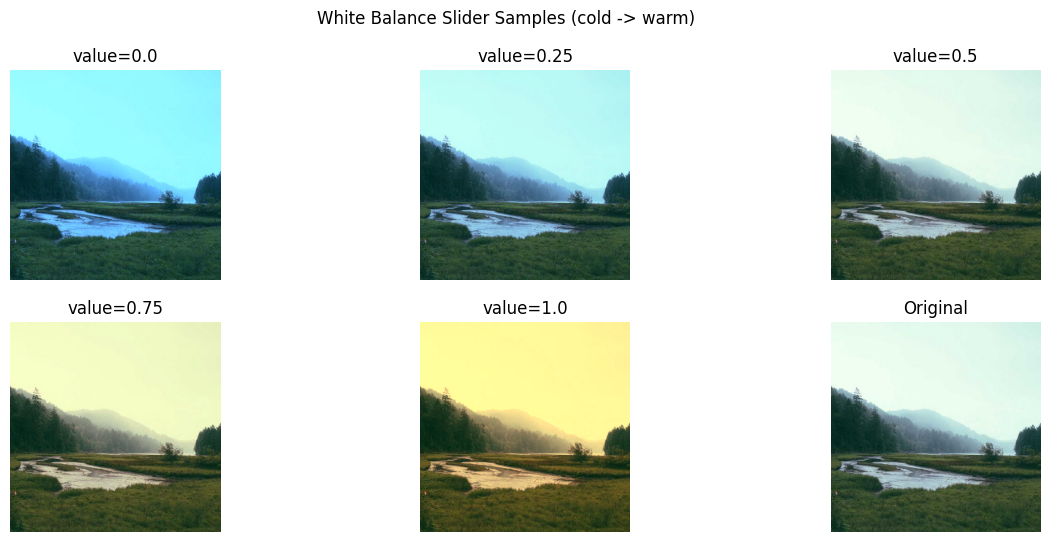

In [23]:
vals = [0.0, 0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(15,6))
for i,v in enumerate(vals, start=1):
    plt.subplot(2,3,i)
    plt.imshow(white_balance(img_rgb_new, v))
    plt.title(f"value={v}")
    plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(img_rgb_new); plt.title("Original"); plt.axis("off")
plt.suptitle("White Balance Slider Samples (cold -> warm)", y=0.98)
plt.show()

In [29]:
# Interactive slider (for phone's app style user interaction)
try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider

    @interact(value=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description="WB"))
    def _wb_slider(value=0.5):
        out = white_balance(img_rgb, value)
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
        plt.subplot(1,2,2); plt.imshow(out);     plt.title(f"white_balance(value={value:.2f})"); plt.axis("off")
        plt.show()

except Exception as e:
    print("ipywidgets slider not available in this environment:", repr(e))
    print("You can still call white_balance(img_rgb, value) normally.")

interactive(children=(FloatSlider(value=0.5, description='WB', max=1.0, step=0.01), Output()), _dom_classes=('…